In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


En primer lugar se cargan los datos y se verifica si existen valores faltantes.

In [2]:
raw_data=pd.read_csv("ML_cars.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Como se puede ver en la salida de arriba no hay valores faltantes. Ahora continuamos eliminando las columnas que no aportan ningún valor para el análisis exploratorio ya que son las identificaciones de los vehículos y sus nombres.

In [3]:
del raw_data['car_ID']
del raw_data['CarName']
raw_data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Luego procedemos a cambiarle el nombre a las columnas para identificarlas más fácilmente y que solo al ver el nombre sepamos de que se trata dicha columna

In [4]:
raw_data.rename(columns={'symboling':'Riesgo','fueltype':'Combustible','aspiration':'Aspiración','doornumber':'Puertas','carbody':'Carroceria',
       'drivewheel':'Tracción', 'enginelocation':'UbicaciónMotor', 'wheelbase':'DistanciaEje', 'carlength':'Largo', 'carwidth':'Ancho',
       'carheight':'Altura', 'curbweight':'POM', 'enginetype':'TipoMotor', 'cylindernumber':'NúmeroCilindros', 'enginesize':'TamañoMotor',
       'fuelsystem':'SistemaCombustible', 'boreratio':'Diam/Carr', 'stroke':'Cilindrada', 'compressionratio':'RelaciónCompresión', 'horsepower':'HP',
       'peakrpm':'RPM_Max', 'citympg':'ConsumoCiudad', 'highwaympg':'ConsumoRuta', 'price':'Precio'},inplace=True)

Vamos a realizar un primer análisis exploratorio de los datos basandonos en el tipo de variable.
Comenzaremos con las variables cualitativas en este caso tenemos
- Cualitativas ordinales:
    1) Riesgo
- Cualitativas nominales
    1) Combustible
    2) Aspiración
    3) Puertas
    4) Carrocería
    5) Tracción
    6) Ubicación del motor
    7) Tipo de motor
    8) Sistema de combustible

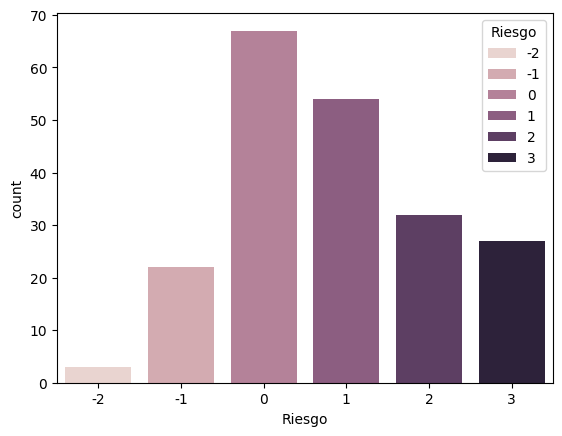

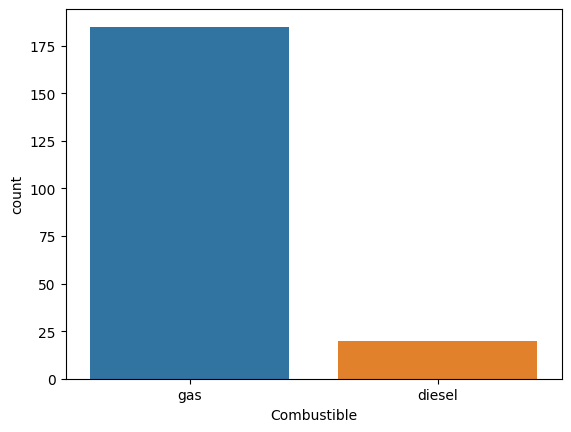

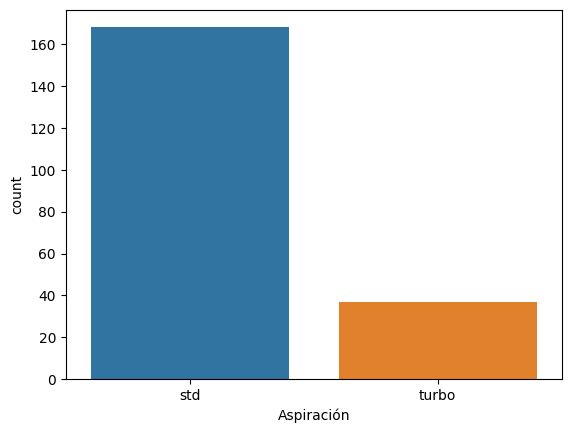

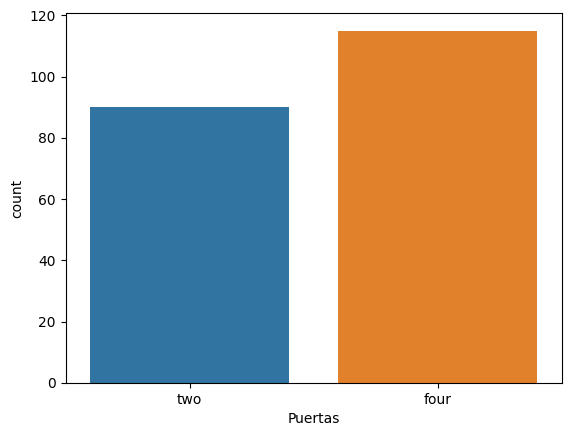

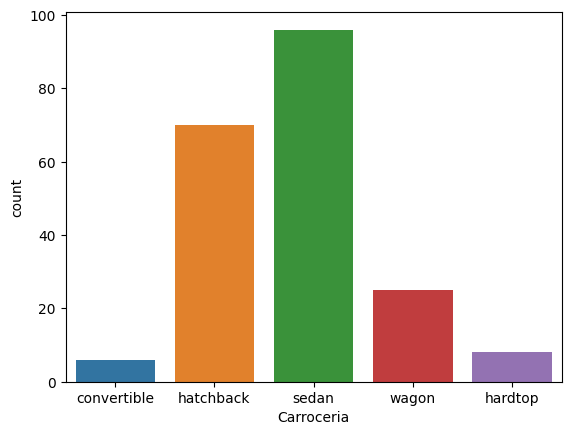

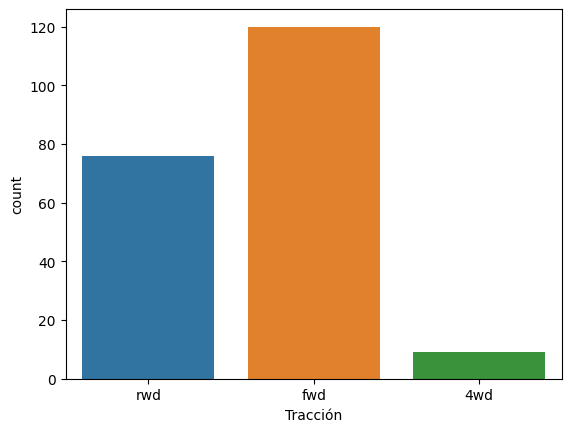

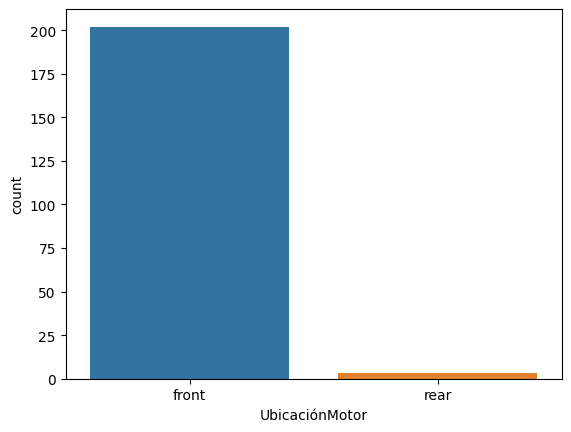

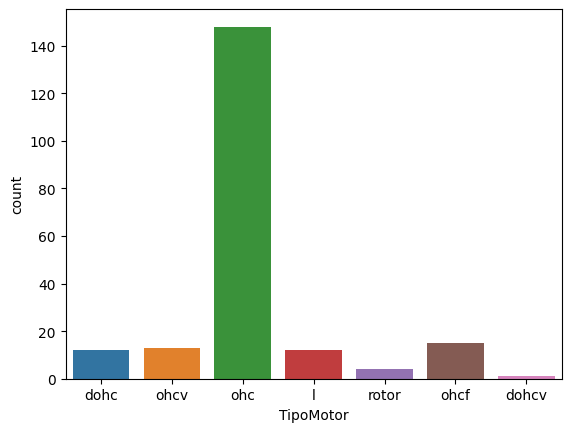

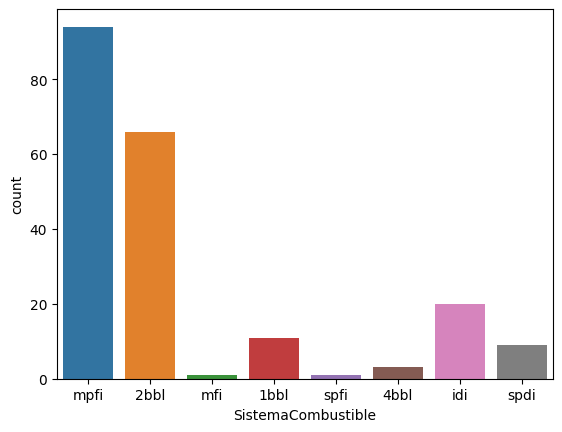

In [5]:
variables_cualitativas=['Riesgo', 'Combustible', 'Aspiración', 'Puertas', 'Carroceria',
       'Tracción', 'UbicaciónMotor', 'TipoMotor','SistemaCombustible']
for variable in variables_cualitativas:
    plt.figure()
    sns.countplot(data=raw_data, x=variable, hue=variable)
    plt.show()

Ahora se continua con las variables cuantitativas:
- Cuantitativas discretas:
    1) Número de cilindros
- Cuantitativas continuas:
    1) Distancia entre los ejes
    2) Largo del vehículo
    3) Ancho del vehículo
    4) Altura del vehículo
    5) Peso de orden en marcha
    6) Tamaño del motor
    7) Relación diametro/carrera
    8) Cilindrada
    9) Relación de compresión
    10) Caballos de potencia
    11) Revoluciones máximas
    12) Consumo en ciudad
    13) Consumo en ruta
    14) Precio

En el caso particular del número de cilindros cambiaremos los datos y los pasaremos de letras a números

In [6]:
raw_data.loc[raw_data['NúmeroCilindros']=='four','NúmeroCilindros']=4
raw_data.loc[raw_data['NúmeroCilindros']=='six','NúmeroCilindros']=6
raw_data.loc[raw_data['NúmeroCilindros']=='three','NúmeroCilindros']=3
raw_data.loc[raw_data['NúmeroCilindros']=='twelve','NúmeroCilindros']=12
raw_data.loc[raw_data['NúmeroCilindros']=='two','NúmeroCilindros']=2
raw_data.loc[raw_data['NúmeroCilindros']=='five','NúmeroCilindros']=5
raw_data.loc[raw_data['NúmeroCilindros']=='eight','NúmeroCilindros']=8

In [7]:
raw_data['NúmeroCilindros']=raw_data['NúmeroCilindros'].astype('float64')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Riesgo              205 non-null    int64  
 1   Combustible         205 non-null    object 
 2   Aspiración          205 non-null    object 
 3   Puertas             205 non-null    object 
 4   Carroceria          205 non-null    object 
 5   Tracción            205 non-null    object 
 6   UbicaciónMotor      205 non-null    object 
 7   DistanciaEje        205 non-null    float64
 8   Largo               205 non-null    float64
 9   Ancho               205 non-null    float64
 10  Altura              205 non-null    float64
 11  POM                 205 non-null    int64  
 12  TipoMotor           205 non-null    object 
 13  NúmeroCilindros     205 non-null    float64
 14  TamañoMotor         205 non-null    int64  
 15  SistemaCombustible  205 non-null    object 
 16  Diam/Car

<Axes: xlabel='NúmeroCilindros', ylabel='count'>

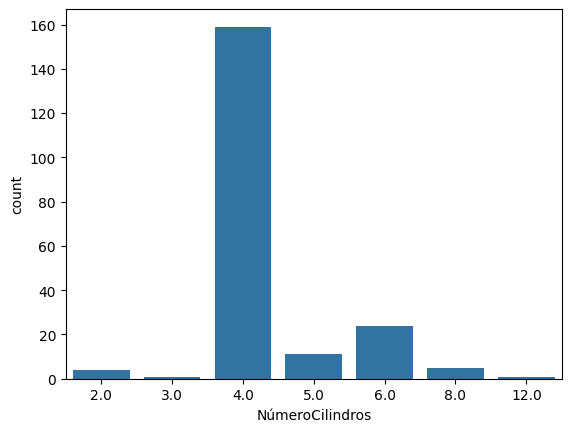

In [8]:
sns.countplot(data=raw_data, x='NúmeroCilindros')

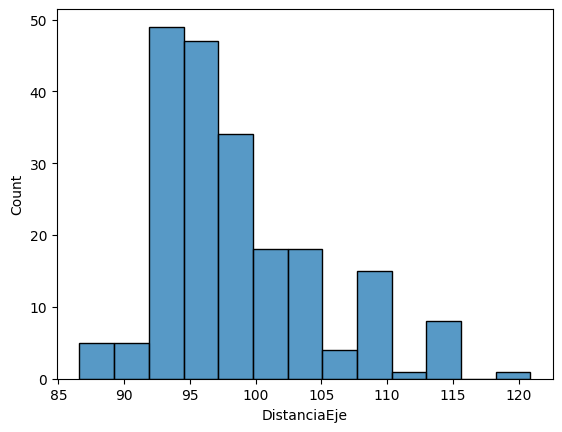

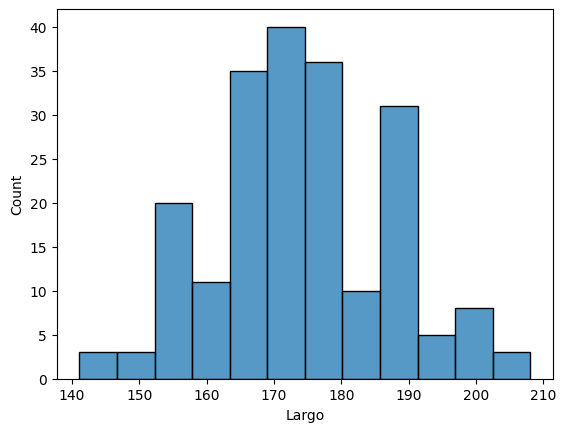

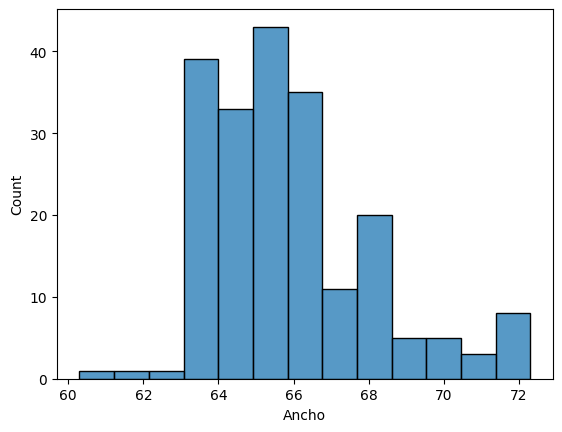

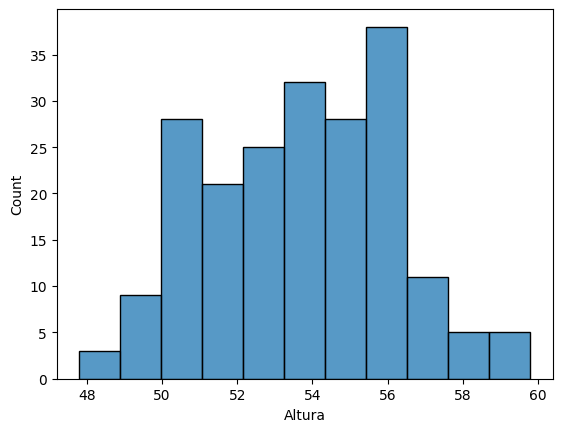

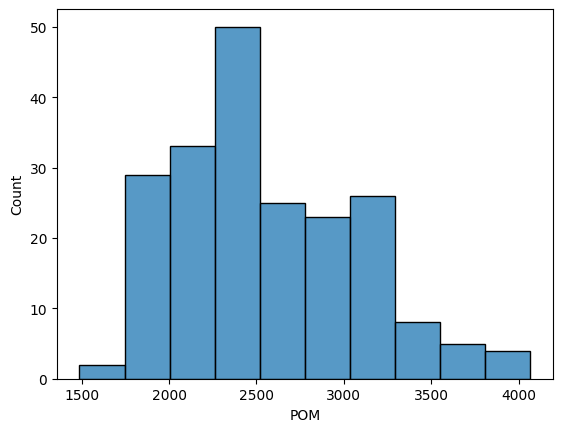

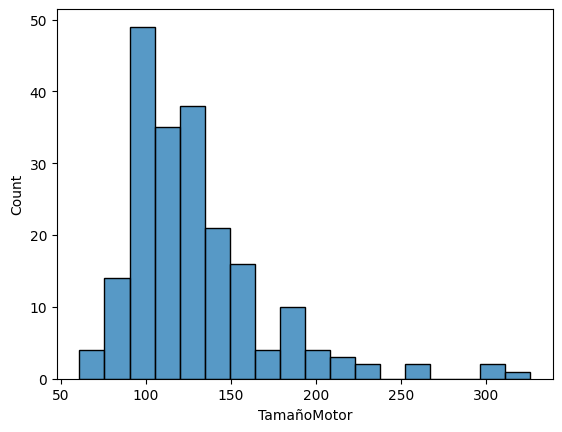

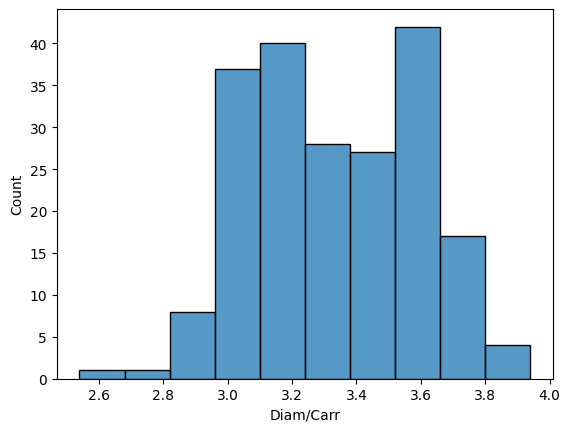

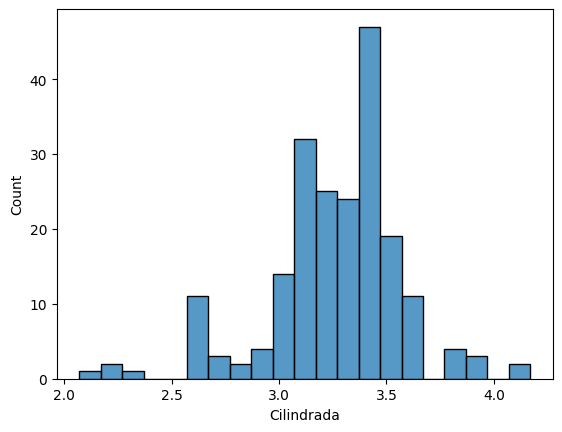

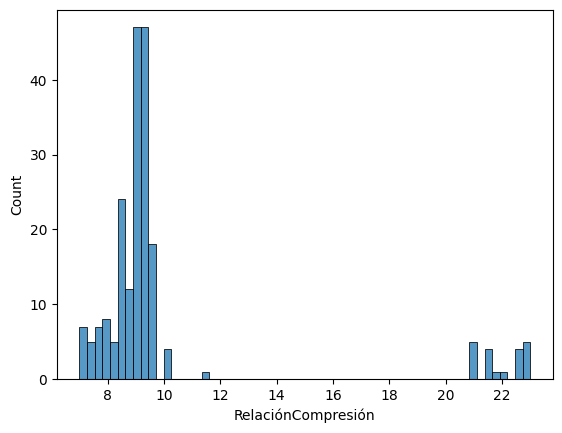

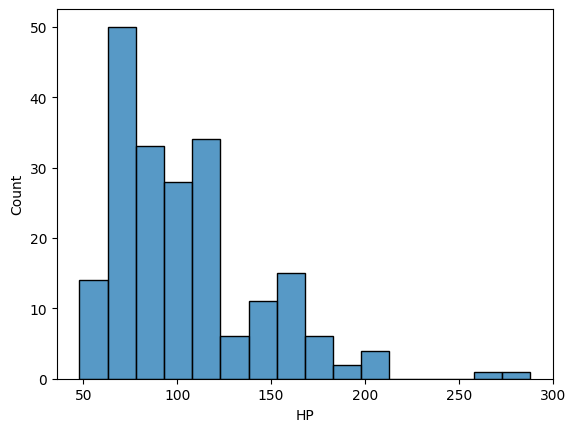

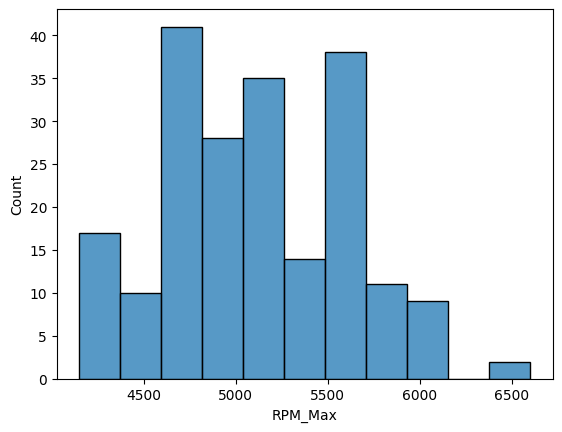

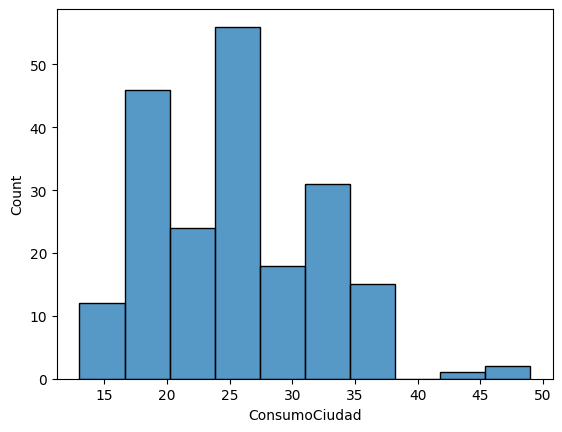

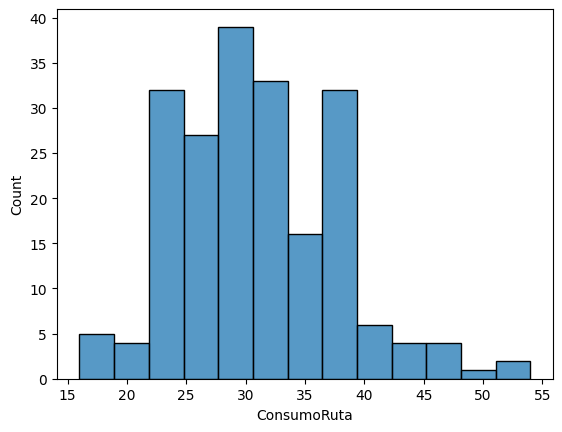

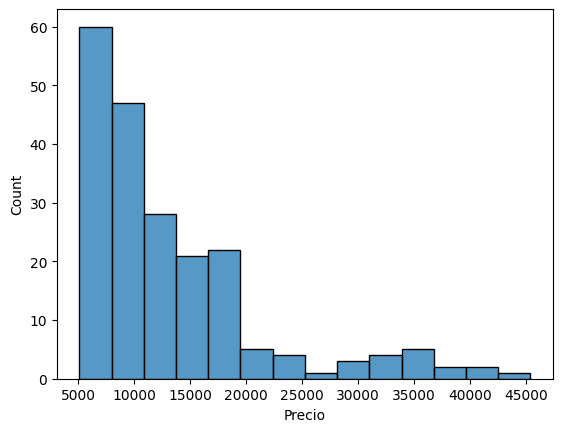

In [9]:
variables_cuantitativas=['DistanciaEje', 'Largo', 'Ancho','Altura', 'POM', 'TamañoMotor','Diam/Carr', 'Cilindrada', 'RelaciónCompresión',
'HP', 'RPM_Max', 'ConsumoCiudad', 'ConsumoRuta', 'Precio']
for variable in variables_cuantitativas:
    plt.figure()
    sns.histplot(data=raw_data, x=variable)
    plt.show()

Revisar valores atipicos

El próxima paso es cambiar las categorias de riesgo para que sean más evidentes.

In [10]:
raw_data.loc[raw_data['Riesgo']==3,'Riesgo']='++I'
raw_data.loc[raw_data['Riesgo']==2,'Riesgo']='+I'
raw_data.loc[raw_data['Riesgo']==1,'Riesgo']='I'
raw_data.loc[raw_data['Riesgo']==0,'Riesgo']='N'
raw_data.loc[raw_data['Riesgo']==-1,'Riesgo']='S'
raw_data.loc[raw_data['Riesgo']==-2,'Riesgo']='+S'
raw_data.loc[raw_data['Riesgo']==-3,'Riesgo']='+S'
raw_data

C:\Users\juan\AppData\Local\Temp\ipykernel_21464\915653708.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '++I' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  raw_data.loc[raw_data['Riesgo']==3,'Riesgo']='++I'


,Riesgo,Combustible,Aspiración,Puertas,Carroceria,Tracción,UbicaciónMotor,DistanciaEje,Largo,Ancho,...,TamañoMotor,SistemaCombustible,Diam/Carr,Cilindrada,RelaciónCompresión,HP,RPM_Max,ConsumoCiudad,ConsumoRuta,Precio
0,++I,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,++I,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,I,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,+I,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,+I,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,S,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,S,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,S,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,S,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Como no podemos pasarle datos como strings o sea las categorias, entonces realizamos una codificación de las variables cualitativas. Esto se hace de manera fácil con la funcion get_dummies() de pandas.

In [11]:
data_dummie=pd.get_dummies(raw_data,dtype=int)
data_dummie

,DistanciaEje,Largo,Ancho,Altura,POM,NúmeroCilindros,TamañoMotor,Diam/Carr,Cilindrada,RelaciónCompresión,...,TipoMotor_ohcv,TipoMotor_rotor,SistemaCombustible_1bbl,SistemaCombustible_2bbl,SistemaCombustible_4bbl,SistemaCombustible_idi,SistemaCombustible_mfi,SistemaCombustible_mpfi,SistemaCombustible_spdi,SistemaCombustible_spfi
0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,6.0,152,2.68,3.47,9.0,...,1,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,4.0,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,5.0,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,4.0,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,55.5,3049,4.0,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,55.5,3012,6.0,173,3.58,2.87,8.8,...,1,0,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,55.5,3217,6.0,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


Ahora se crea un dataframe para ver las correlaciones y decidir cuales son importantes y cuales no. Para esto se considera una correlación importante cuando tiene un coeficiente mayor a 0.6 en valor absoluto.

In [12]:
correlaciones=data_dummie.copy()
correlaciones=correlaciones.corr()
correlaciones['Precio'][correlaciones['Precio']>0.6]

Largo              0.682920
Ancho              0.759325
POM                0.835305
NúmeroCilindros    0.718305
TamañoMotor        0.874145
HP                 0.808139
Precio             1.000000
Tracción_rwd       0.638957
Name: Precio, dtype: float64

In [13]:
correlaciones['Precio'][correlaciones['Precio']<-0.6]

ConsumoCiudad   -0.685751
ConsumoRuta     -0.697599
Tracción_fwd    -0.601950
Name: Precio, dtype: float64

In [14]:
mask1=correlaciones['Precio']<-0.6
mask2=correlaciones['Precio']>0.6

In [15]:
columnas=correlaciones['Precio'][mask1|mask2]


In [16]:
lista=list()
for i in columnas.index:
    lista.append(i)

In [20]:
data_final=data_dummie[lista].copy()
data_final

,Largo,Ancho,POM,NúmeroCilindros,TamañoMotor,HP,ConsumoCiudad,ConsumoRuta,Precio,Tracción_fwd,Tracción_rwd
0,168.8,64.1,2548,4.0,130,111,21,27,13495.0,0,1
1,168.8,64.1,2548,4.0,130,111,21,27,16500.0,0,1
2,171.2,65.5,2823,6.0,152,154,19,26,16500.0,0,1
3,176.6,66.2,2337,4.0,109,102,24,30,13950.0,1,0
4,176.6,66.4,2824,5.0,136,115,18,22,17450.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,2952,4.0,141,114,23,28,16845.0,0,1
201,188.8,68.8,3049,4.0,141,160,19,25,19045.0,0,1
202,188.8,68.9,3012,6.0,173,134,18,23,21485.0,0,1
203,188.8,68.9,3217,6.0,145,106,26,27,22470.0,0,1


In [23]:
data_final = data_final[[col for col in data_final.columns if col != 'Precio'] + ['Precio']]
data_final

,Largo,Ancho,POM,NúmeroCilindros,TamañoMotor,HP,ConsumoCiudad,ConsumoRuta,Tracción_fwd,Tracción_rwd,Precio
0,168.8,64.1,2548,4.0,130,111,21,27,0,1,13495.0
1,168.8,64.1,2548,4.0,130,111,21,27,0,1,16500.0
2,171.2,65.5,2823,6.0,152,154,19,26,0,1,16500.0
3,176.6,66.2,2337,4.0,109,102,24,30,1,0,13950.0
4,176.6,66.4,2824,5.0,136,115,18,22,0,0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,2952,4.0,141,114,23,28,0,1,16845.0
201,188.8,68.8,3049,4.0,141,160,19,25,0,1,19045.0
202,188.8,68.9,3012,6.0,173,134,18,23,0,1,21485.0
203,188.8,68.9,3217,6.0,145,106,26,27,0,1,22470.0


In [26]:
gama=list()
for precio in data_final['Precio']:
    if precio>data_final['Precio'].median():
        gama.append("Alta")
    else:
        gama.append("Baja")
data_final['Gama']=gama

In [27]:
data_final

,Largo,Ancho,POM,NúmeroCilindros,TamañoMotor,HP,ConsumoCiudad,ConsumoRuta,Tracción_fwd,Tracción_rwd,Precio,Gama
0,168.8,64.1,2548,4.0,130,111,21,27,0,1,13495.0,Alta
1,168.8,64.1,2548,4.0,130,111,21,27,0,1,16500.0,Alta
2,171.2,65.5,2823,6.0,152,154,19,26,0,1,16500.0,Alta
3,176.6,66.2,2337,4.0,109,102,24,30,1,0,13950.0,Alta
4,176.6,66.4,2824,5.0,136,115,18,22,0,0,17450.0,Alta
...,...,...,...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,2952,4.0,141,114,23,28,0,1,16845.0,Alta
201,188.8,68.8,3049,4.0,141,160,19,25,0,1,19045.0,Alta
202,188.8,68.9,3012,6.0,173,134,18,23,0,1,21485.0,Alta
203,188.8,68.9,3217,6.0,145,106,26,27,0,1,22470.0,Alta


In [29]:
data_final['Gama'].value_counts

Gama
Baja    103
Alta    102
Name: count, dtype: int64

In [28]:
data_final.to_csv('DatosProcesados.csv')